In [1]:
import skdemo
import matplotlib.pyplot as plt
from skimage import data, img_as_float, io

(<AxesSubplot:>, <AxesSubplot:xlabel='intensity', ylabel='# pixels'>)

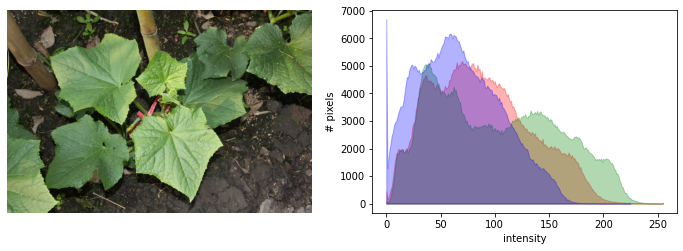

In [2]:
leaves = io.imread('leaves.jpg')
skdemo.imshow_with_histogram(leaves)

(<AxesSubplot:>, <AxesSubplot:xlabel='intensity', ylabel='# pixels'>)

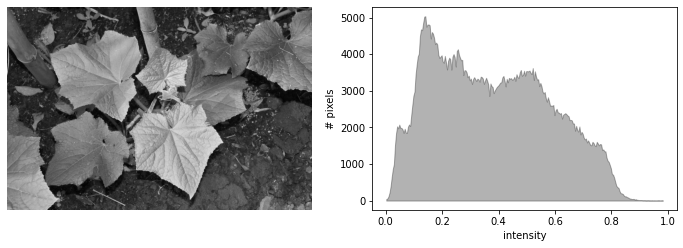

In [3]:
leaves_gray = io.imread('leaves.jpg', as_gray=True)
skdemo.imshow_with_histogram(leaves_gray)

(<AxesSubplot:>, <AxesSubplot:xlabel='intensity', ylabel='# pixels'>)

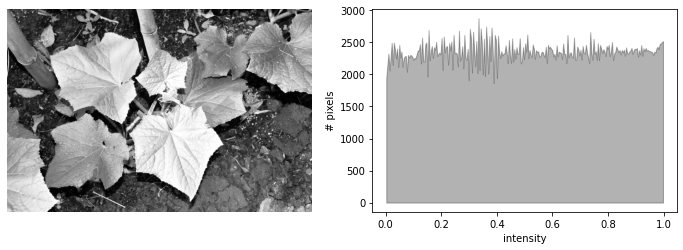

In [49]:
from skimage import exposure

equalized_gray = exposure.equalize_hist(leaves_gray)
skdemo.imshow_with_histogram(equalized_gray)

0.3865841498161765


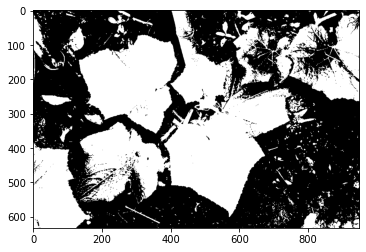

In [7]:
from skimage import filters

otsu_thresh = filters.threshold_otsu(leaves_gray)
print(otsu_thresh)
otsu_binary = leaves_gray > otsu_thresh
plt.imshow(otsu_binary, cmap='gray')
plt.show()

[[0.33738157 0.32589961 0.30853882 ... 0.45575961 0.44791647 0.4439949 ]
 [0.33738157 0.32982118 0.31638196 ... 0.41850824 0.4224298  0.44988078]
 [0.34130314 0.33374275 0.32365961 ... 0.42524235 0.41347765 0.39779137]
 ...
 [0.60621725 0.60789882 0.61574196 ... 0.4504     0.47000784 0.48961569]
 [0.60397725 0.60005569 0.60818157 ... 0.47785098 0.47785098 0.47392941]
 [0.60005569 0.61210314 0.61994627 ... 0.49353725 0.48961569 0.48569412]]
[[0.26656178 0.26656104 0.26655956 ... 0.37418661 0.3741981  0.37420383]
 [0.26656431 0.26656357 0.26656209 ... 0.37419071 0.3742022  0.37420793]
 [0.26656936 0.26656862 0.26656715 ... 0.3741989  0.37421039 0.37421612]
 ...
 [0.51574038 0.51572808 0.51570348 ... 0.29230537 0.29230325 0.29230219]
 [0.5157549  0.5157426  0.515718   ... 0.2923144  0.29231228 0.29231122]
 [0.51576214 0.51574984 0.51572523 ... 0.29231892 0.2923168  0.29231574]]


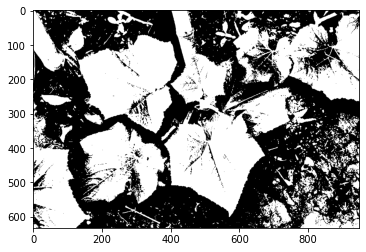

In [31]:
block_size = 577
local_thresh = filters.threshold_local(leaves_gray, block_size)
print(leaves_gray)
print(local_thresh)
local_binary = leaves_gray > local_thresh
plt.imshow(local_binary, cmap='gray')
plt.show()

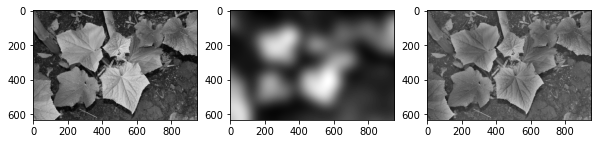

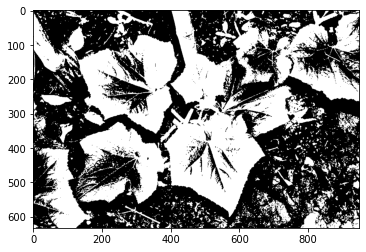

In [35]:
from skimage import morphology, img_as_float

img = img_as_float(leaves_gray)
bg = morphology.erosion(img, morphology.square(31))
bg = filters.gaussian(bg, sigma=37)
result = img - bg

plt.figure(figsize=(10,8))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(bg, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result, cmap="gray")
plt.show()

front = result > 0.2
plt.imshow(front, cmap="gray")

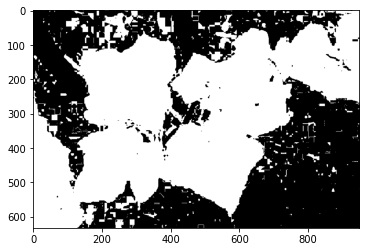

In [47]:
import numpy as np
from skimage.color import rgb2hsv

width = leaves.shape[1]
height = leaves.shape[0]
img = np.zeros((height,width))

leaves_hsv = rgb2hsv(leaves)
img[np.logical_and(leaves_hsv[:, :, 0]>0.2, leaves_hsv[:, :, 0]<0.5)] = 255

plt.imshow(img)
plt.show()